In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("CSV Files/dirty_data.csv")

In [4]:
data.head()

,Order ID,Customer Name,Order Date,Product Category,Product Name,Quantity Ordered,Price Each,Order Amount,City,Country,Payment Method
0,ORD1000,Alice Johnson,2023-09-28,Electronics,Laptop,3,81.69,245.07,Los Angeles,USA,PayPal
1,ORD1001,Eva Green,2023-01-21,Electronics,Headphones,3,80.17,240.51,New York,USA,Bank Transfer
2,ORD1002,John Doe,2023-08-03,Electronics,Laptop,3,50.12,150.36,Los Angeles,USA,Credit Card
3,ORD1003,Eva Green,2023-04-10,Sports,Football,3,51.33,153.99,Houston,USA,Bank Transfer
4,ORD1004,John Doe,2023-05-30,Sports,Sneakers,4,73.73,294.92,Los Angeles,NaN,Bank Transfer


In [5]:
data.shape

(102, 11)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order ID          102 non-null    object 
 1   Customer Name     101 non-null    object 
 2   Order Date        102 non-null    object 
 3   Product Category  102 non-null    object 
 4   Product Name      102 non-null    object 
 5   Quantity Ordered  102 non-null    int64  
 6   Price Each        101 non-null    float64
 7   Order Amount      102 non-null    float64
 8   City              85 non-null     object 
 9   Country           83 non-null     object 
 10  Payment Method    102 non-null    object 
dtypes: float64(2), int64(1), object(8)
memory usage: 8.9+ KB


In [7]:
data.duplicated().sum()

2

In [8]:
data[data.duplicated()]

,Order ID,Customer Name,Order Date,Product Category,Product Name,Quantity Ordered,Price Each,Order Amount,City,Country,Payment Method
100,ORD1010,Jane Smith,2023-09-28,Home,Lamp,4,36.29,145.16,New York,USA,Cash
101,ORD1025,Alice Johnson,2023-08-03,Electronics,Headphones,3,92.97,278.91,Phoenix,USA,Credit Card


In [9]:
data_clean = data.drop_duplicates()

In [34]:
data_clean.isnull().sum()

Order ID             0
Customer Name        0
Order Date           0
Product Category     0
Product Name         0
Quantity Ordered     0
Price Each           0
Order Amount         0
City                17
Country             19
Payment Method       0
dtype: int64

In [19]:
data_clean['Customer Name'].fillna('Unknown', inplace = True)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16408\1803972507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Customer Name'].fillna('Unknown', inplace = True)


In [20]:
data_clean['Customer Name'].isnull().sum()

0

In [23]:
data_clean['Price Each'].isnull().sum()

1

In [24]:
data_clean[data_clean['Price Each'].isnull()]

,Order ID,Customer Name,Order Date,Product Category,Product Name,Quantity Ordered,Price Each,Order Amount,City,Country,Payment Method
20,ORD1020,Bob Lee,2023-01-02,Clothing,Jacket,4,NaN,105.6,New York,USA,Credit Card


In [25]:
mean_price = data_clean['Price Each'].mean()

In [26]:
mean_price

55.981919191919204

In [32]:
data_clean.loc[:, 'Price Each'] = data_clean['Price Each'].fillna(mean_price)

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16408\4160708452.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:, 'Price Each'] = data_clean['Price Each'].fillna(mean_price)


In [33]:
data_clean[data_clean['Price Each'].isnull()]

,Order ID,Customer Name,Order Date,Product Category,Product Name,Quantity Ordered,Price Each,Order Amount,City,Country,Payment Method


In [40]:
data_clean['City'].isnull().sum()

0

In [41]:
data_clean['Country'].isnull().sum()

0

In [38]:
data_clean.loc[:, 'City'] = data_clean['City'].fillna('Unknown')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16408\3524774049.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:, 'City'] = data_clean['City'].fillna('Unknown')


In [39]:
data_clean.loc[:, 'Country'] = data_clean['Country'].fillna('Unknown')

C:\Users\Aryan\AppData\Local\Temp\ipykernel_16408\1768554268.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean.loc[:, 'Country'] = data_clean['Country'].fillna('Unknown')


In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

In [50]:
data_clean.head()

,Order ID,Customer Name,Order Date,Product Category,Product Name,Quantity Ordered,Price Each,Order Amount,City,Country,Payment Method
0,ORD1000,Alice Johnson,2023-09-28,Electronics,Laptop,3,55.981919,245.07,Los Angeles,USA,PayPal
1,ORD1001,Eva Green,2023-01-21,Electronics,Headphones,3,55.981919,240.51,New York,USA,Bank Transfer
2,ORD1002,John Doe,2023-08-03,Electronics,Laptop,3,55.981919,150.36,Los Angeles,USA,Credit Card
3,ORD1003,Eva Green,2023-04-10,Sports,Football,3,55.981919,153.99,Houston,USA,Bank Transfer
4,ORD1004,John Doe,2023-05-30,Sports,Sneakers,4,55.981919,294.92,Los Angeles,Unknown,Bank Transfer


In [43]:
data_clean.describe()

,Quantity Ordered,Price Each,Order Amount
count,100.000000,1.000000e+02,100.00000
mean,2.670000,5.598192e+01,148.69750
std,1.119659,6.427101e-14,94.14058
min,1.000000,5.598192e+01,14.18000
25%,2.000000,5.598192e+01,73.67250
50%,3.000000,5.598192e+01,128.02000
75%,4.000000,5.598192e+01,227.34000
max,4.000000,5.598192e+01,362.96000


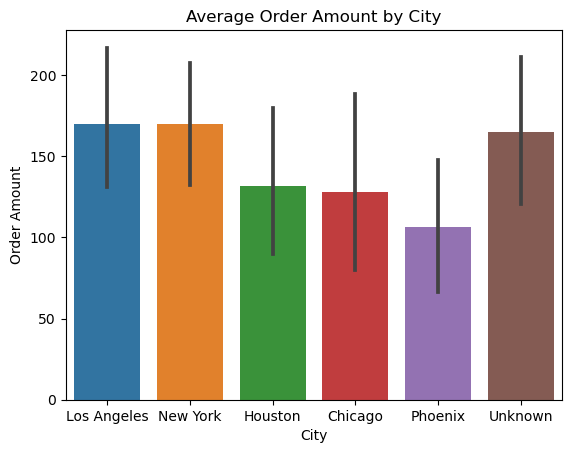

In [49]:
sns.barplot(x='City', y='Order Amount', data=data_clean)
plt.xticks(rotation=0)
plt.title('Average Order Amount by City')
plt.show()

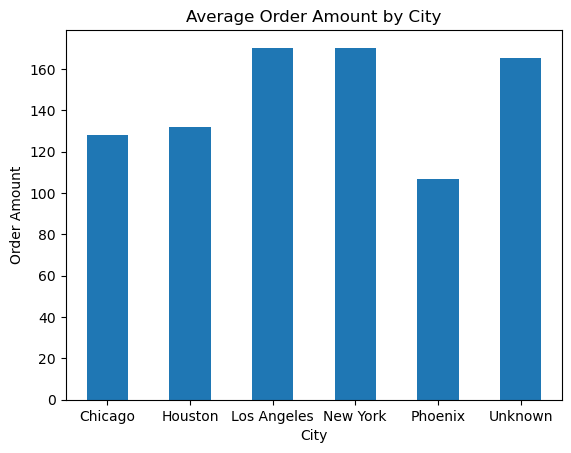

In [48]:
data_clean.groupby('City')['Order Amount'].mean().plot(kind='bar')
plt.title('Average Order Amount by City')
plt.xticks(rotation=0)
plt.ylabel('Order Amount')
plt.show()

In [52]:
category_totals = data_clean.groupby('Product Category')['Quantity Ordered'].sum().reset_index()

In [53]:
category_totals.head()

,Product Category,Quantity Ordered
0,Beauty,45
1,Clothing,51
2,Electronics,51
3,Home,60
4,Sports,60


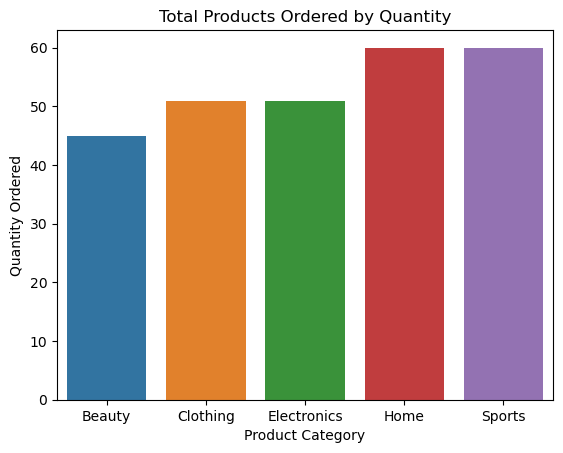

In [54]:
sns.barplot(x='Product Category', y='Quantity Ordered', data=category_totals)
plt.xticks(rotation=0)
plt.title('Total Products Ordered by Quantity')
plt.show()

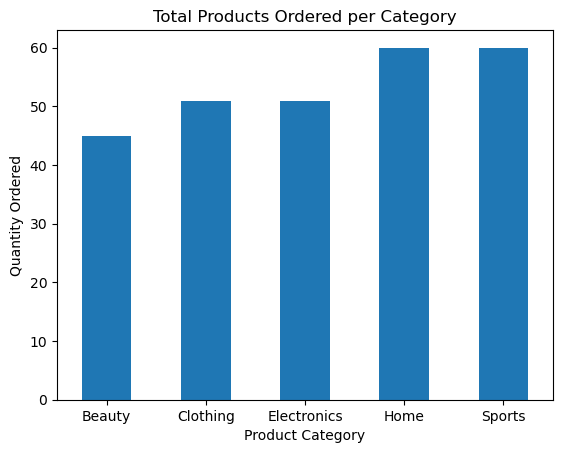

In [59]:
data_clean.groupby('Product Category')['Quantity Ordered'].sum().plot(kind='bar')
plt.title('Total Products Ordered per Category')
plt.xlabel('Product Category')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=0)
plt.show()

In [62]:
category_amount_totals = data_clean.groupby('Product Category')['Order Amount'].sum().reset_index()

In [63]:
category_amount_totals.head()

,Product Category,Order Amount
0,Beauty,2743.03
1,Clothing,2797.45
2,Electronics,3169.54
3,Home,3315.73
4,Sports,2844.00


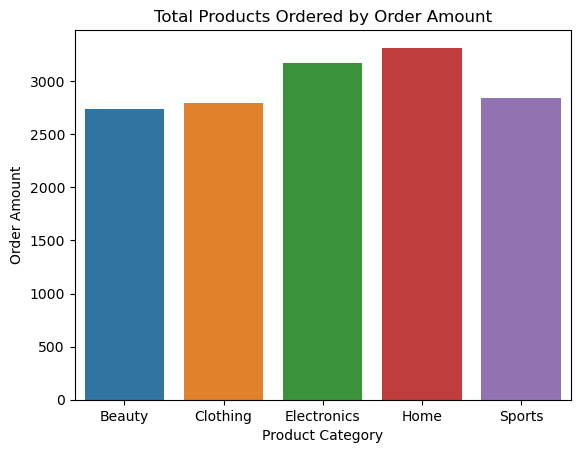

In [64]:
sns.barplot(x='Product Category', y='Order Amount', data=category_amount_totals)
plt.xticks(rotation=0)
plt.title('Total Products Ordered by Order Amount')
plt.show()

In [65]:
customer_order_total = data_clean.groupby('Customer Name')['Order Amount'].sum().reset_index()

In [66]:
customer_order_total.head()

,Customer Name,Order Amount
0,Alice Johnson,4572.72
1,Bob Lee,3199.67
2,Eva Green,2197.49
3,Jane Smith,2165.08
4,John Doe,2637.50


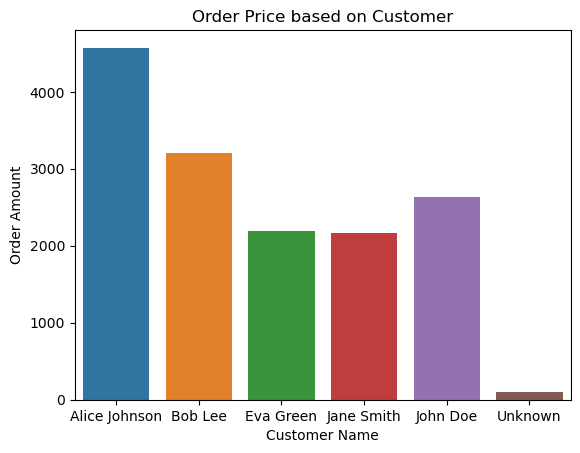

In [67]:
sns.barplot(x='Customer Name', y='Order Amount', data=customer_order_total)
plt.xticks(rotation=0)
plt.title('Order Price based on Customer')
plt.show()

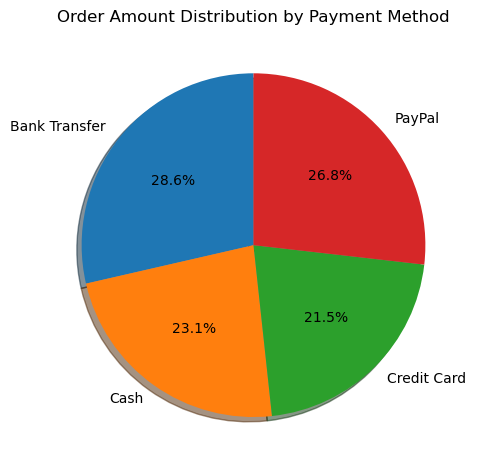

In [68]:
data_clean.groupby('Payment Method')['Order Amount'].sum().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    shadow=True
)

plt.title('Order Amount Distribution by Payment Method')
plt.ylabel('')  # Hide y-label
plt.tight_layout()
plt.show()

In [74]:
data_clean = data_clean.copy()
data_clean['Order Date'] = pd.to_datetime(data_clean['Order Date'])
data_clean.set_index('Order Date', inplace=True)

In [75]:
monthly_sales = data_clean['Order Amount'].resample('M').sum()

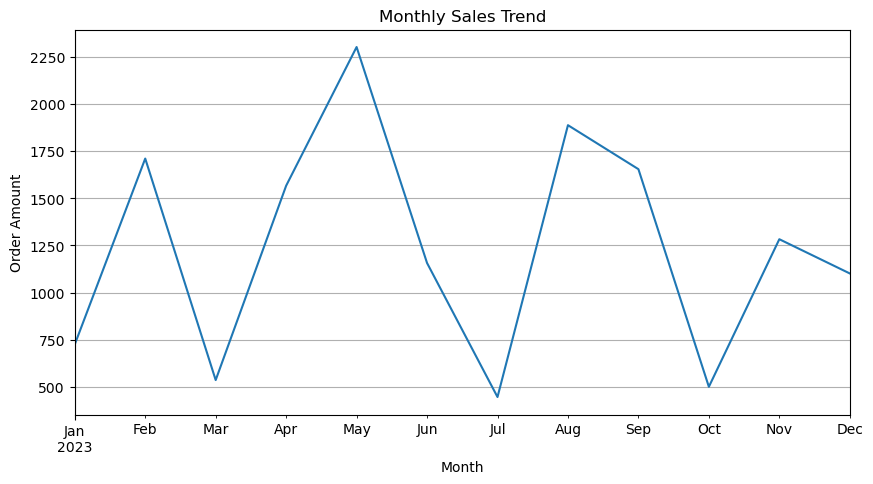

In [76]:
monthly_sales.plot(figsize=(10,5), title='Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Order Amount')
plt.grid(True)
plt.show()

In [77]:
data_clean['Month'] = data_clean['Order Date'].dt.to_period('M')
sns.lineplot(data=data_clean.groupby('Month')['Order Amount'].sum().reset_index(), x='Month', y='Order Amount')

KeyError: 'Order Date'